<a href="https://www.kaggle.com/code/gpreda/bbc-news-rss-feeds-sentiment-analysis?scriptVersionId=134412611" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

This Notebook is a started Notebook for the `BBC News` dataset.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/BBC_News_2019.svg/220px-BBC_News_2019.svg.png"></img>  


It demonstrates how to load the data and perform a quick data inspection.

Also, we perform:
- sentiment analysis
- topic modelling

# Load packages and read the data

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import warnings
warnings.simplefilter("ignore")

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
data_df = pd.read_csv("../input/bbc-news/bbc_news.csv")

# Glimpse the data

In [3]:
data_df.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18589 entries, 0 to 18588
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        18589 non-null  object
 1   pubDate      18589 non-null  object
 2   guid         18589 non-null  object
 3   link         18589 non-null  object
 4   description  18589 non-null  object
dtypes: object(5)
memory usage: 726.3+ KB


# Analyze text data

We quickly look to the text data by showing wordclouds of `title` and `description` fields.

In [5]:
def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

# Prevalent words in title

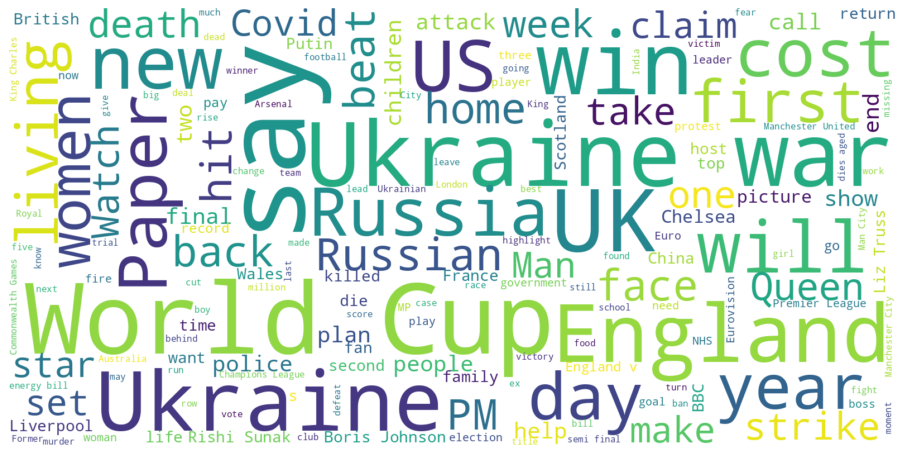

In [6]:
show_wordcloud(data_df['title'], title = '', mask=None)

# Prevalent words in description

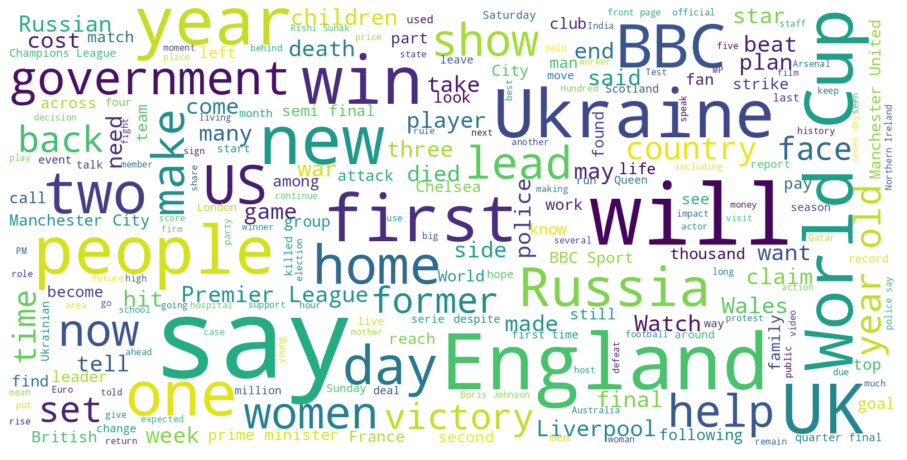

In [7]:
show_wordcloud(data_df['description'], title = '', mask=None)

# Sentiment analysis

In [8]:
# borrowed from https://www.kaggle.com/pashupatigupta/sentiments-transformer-vader-embedding-bert
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [9]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

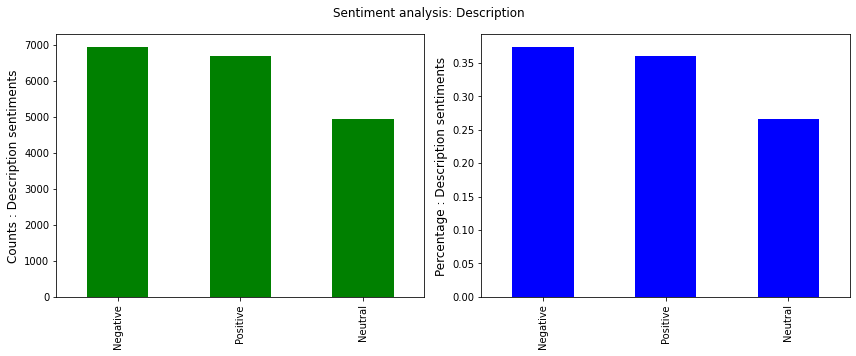

In [10]:
data_df['description_sentiment'] = data_df['description'].apply(lambda x: find_sentiment(x))
plot_sentiment(data_df, 'description_sentiment', 'Description')

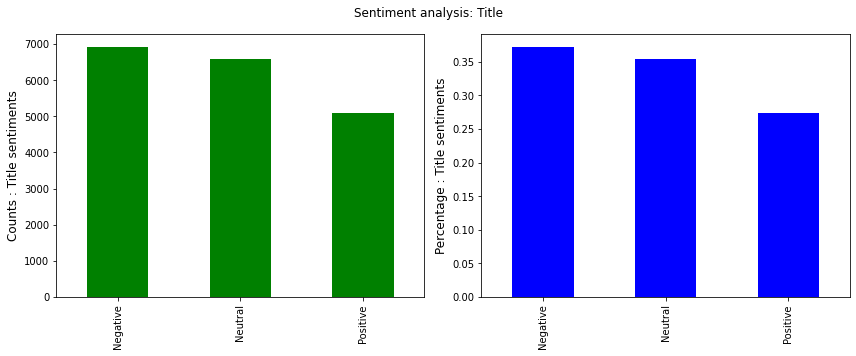

In [11]:
data_df['title_sentiment'] = data_df['title'].apply(lambda x: find_sentiment(x))
plot_sentiment(data_df, 'title_sentiment', 'Title')

## Wordclouds with description words, grouped by sentiment

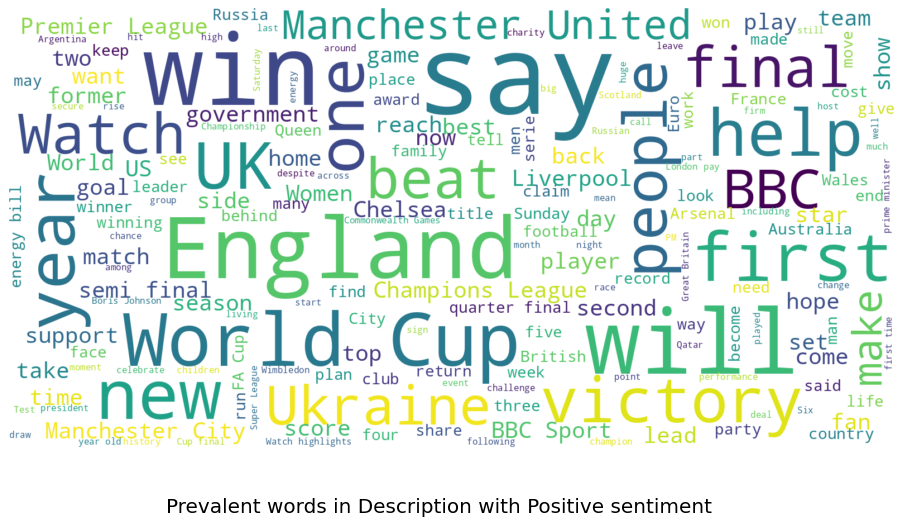

In [12]:
show_wordcloud(data_df.loc[data_df['description_sentiment']=="Positive", 'description'], title = 'Prevalent words in Description with Positive sentiment', mask=None)

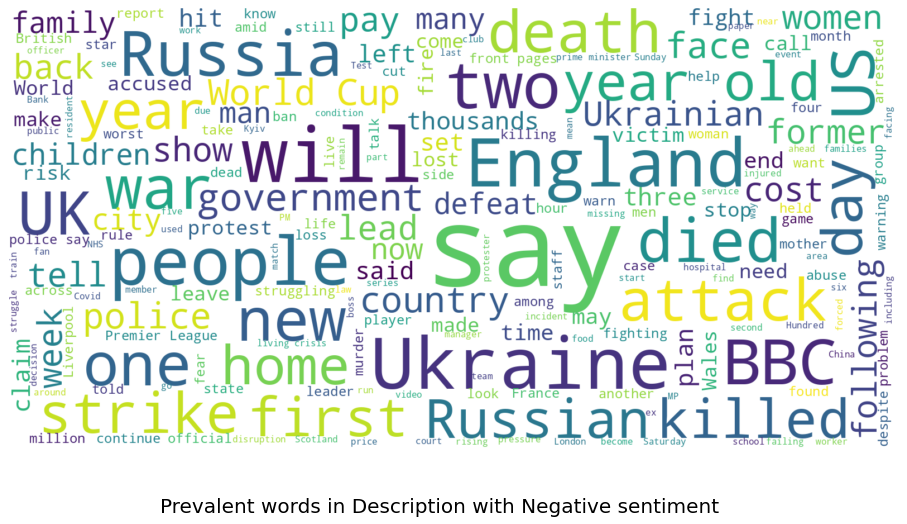

In [13]:
show_wordcloud(data_df.loc[data_df['description_sentiment']=="Negative", 'description'], title = 'Prevalent words in Description with Negative sentiment', mask=None)

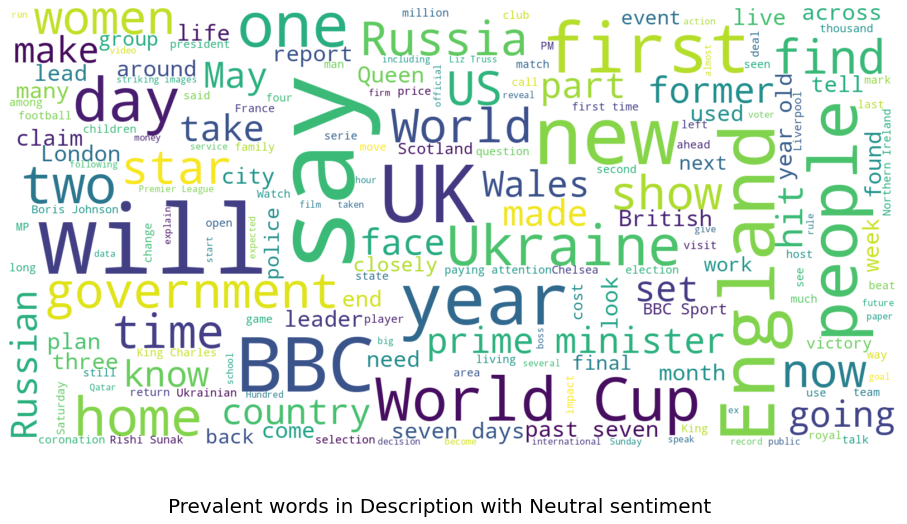

In [14]:
show_wordcloud(data_df.loc[data_df['description_sentiment']=="Neutral", 'description'], title = 'Prevalent words in Description with Neutral sentiment', mask=None)

## Wordclouds with title words, grouped by sentiment

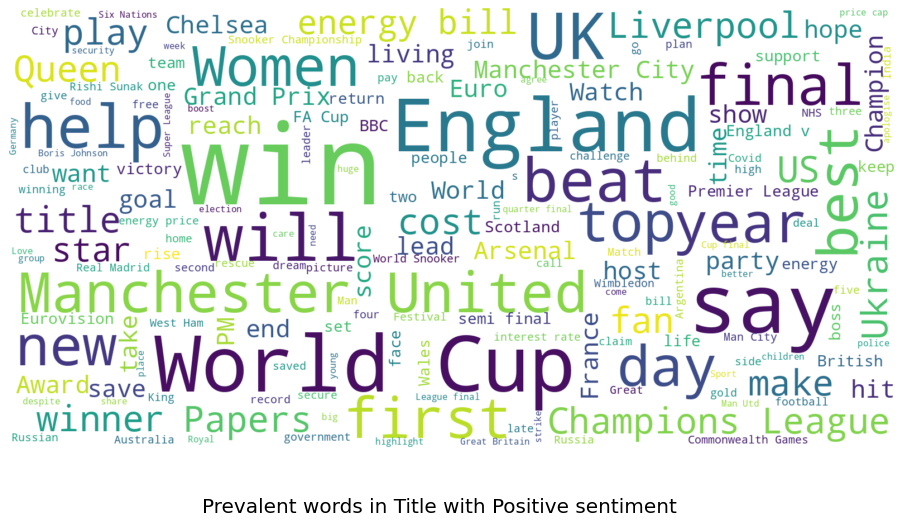

In [15]:
show_wordcloud(data_df.loc[data_df['title_sentiment']=="Positive", 'title'], title = 'Prevalent words in Title with Positive sentiment', mask=None)

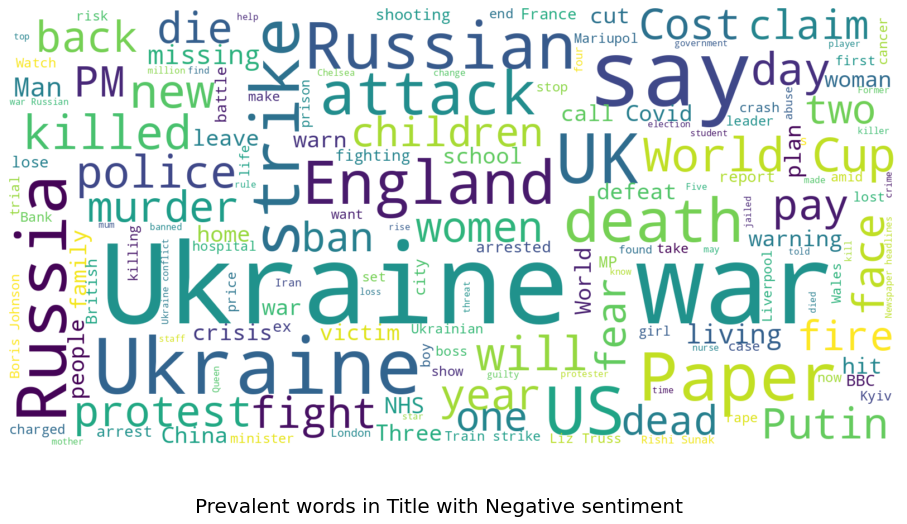

In [16]:
show_wordcloud(data_df.loc[data_df['title_sentiment']=="Negative", 'title'], title = 'Prevalent words in Title with Negative sentiment', mask=None)

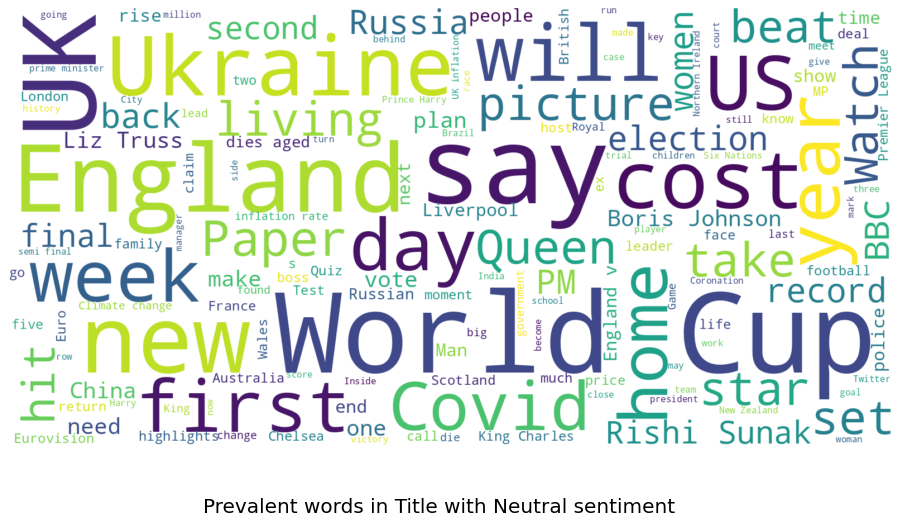

In [17]:
show_wordcloud(data_df.loc[data_df['title_sentiment']=="Neutral", 'title'], title = 'Prevalent words in Title with Neutral sentiment', mask=None)

# Topic modelling

In [18]:
# text vectorization
count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
# drop rows without text
sample_text_df = data_df[["description"]].dropna()
text_sample = sample_text_df["description"].sample(n=sample_text_df.shape[0], random_state=0).values


print('Text sample vectorization: {}'.format(text_sample[9]))
document_term_matrix = count_vectorizer.fit_transform(text_sample)
print('Text sample vectorization: \n{}'.format(document_term_matrix[9]))

Text sample vectorization: The village pub had been asked to change its name but has now received a framed apology.
Text sample vectorization: 
  (0, 19988)	1
  (0, 14810)	1
  (0, 1696)	1
  (0, 3613)	1
  (0, 15268)	1
  (0, 7612)	1
  (0, 1479)	1


Use Latent Dirichlet Allocation to get the topics.
We initialize the number of topics with 10.

In [19]:
n_topics = 10
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(document_term_matrix)

Few helper functions.

Many thanks to Ryan Cushen, author of the Kernel [Topic Modelling with LSA and LDA](https://www.kaggle.com/rcushen/topic-modelling-with-lsa-and-lda) from where I borowed the following utility functions.

In [20]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [21]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [22]:
lsa_keys = get_keys(lda_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

Print top 10 topics (with 10 concepts most used).

In [23]:
top_n_words_lsa = get_top_n_words(n_topics, lsa_keys, document_term_matrix, count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  says people ukraine russian minister prime ireland northern uk new
Topic 2:  world cup england says win new uk women final russia
Topic 3:  bbc cup world says england sport league wales looks goal
Topic 4:  england says test new day king charles queen win death
Topic 5:  world cup manchester final says united city time open league
Topic 6:  says new papers government cost uk lead years sunak living
Topic 7:  say police says people boris johnson government pay new uk
Topic 8:  ukraine president says bbc war russia people country ukrainian thousands
Topic 9:  league year says uk women people win day energy premier
Topic 10:  says say days seven past bbc help going home paying
